In [3]:
!git clone https://github.com/NandanDate/Neural_ninjas.git

Cloning into 'Neural_ninjas'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), 299.81 KiB | 3.06 MiB/s, done.


Import basic libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

%config Completer.use_jedi = False

Data Processing
Load Data


In [5]:
df = pd.read_csv('/content/Neural_ninjas/ICR DATASET/train.csv')
test_df = pd.read_csv('/content/Neural_ninjas/ICR DATASET/test.csv')

orig_df = df.copy()

In [6]:
df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [ ]:
import pandas as pd

# Assuming your Series is named "my_series"
mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'I': 9,
    'J': 10,
    'K': 11,
    'L': 12,
    'M': 13,
    'N': 14,
    'O': 15,
    'P': 16,
    'Q': 17,
    'R': 18,
    'S': 19,
    'T': 20,
    'U': 21,
    'V': 22,
    'W': 23,
    'X': 24,
    'Y': 25,
    'Z': 26
}

# Function to map letters to numbers
def map_letters_to_numbers(value):
    if isinstance(value, str):  # Check if value is a string
        return mapping.get(value, value)  # Return the mapped value if found, otherwise return the original value
    return value  # Return the original value if it's not a string

# Apply the mapping function to the Series
df = df.coloumn(map_letters_to_numbers)

# Printing the updated Series
print(df.head())


In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['EJ'] = label_encoder.fit_transform(df['EJ'])

In [34]:
df.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      617 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      617 non-null    float64
 16  CC      617 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

In [ ]:
# check NAN values
df.isnull().sum()

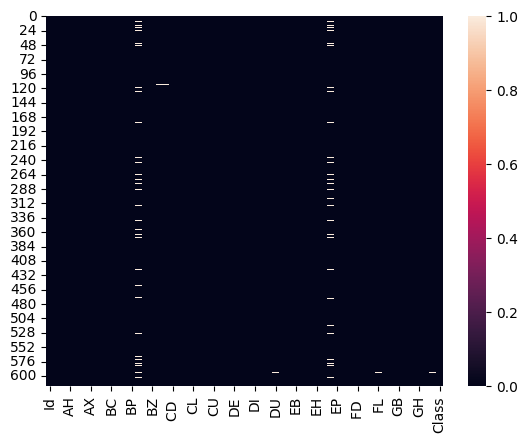

In [9]:
# visualize missing values
sns.heatmap(df.isnull());

In [10]:
# fill NaN in EL by  mean
df.EL.fillna(df.EL.mean(), inplace = True)
test_df.EL.fillna(df.EL.mean(), inplace = True)

In [11]:
df.EL.isnull().sum()

0

In [13]:
# fill NaN in BQ by  mean
df.BQ.fillna(df.BQ.mean(), inplace = True)
test_df.BQ.fillna(df.BQ.mean(), inplace = True)

In [ ]:
df.isnull().sum()

In [15]:
# no duplicate values
df.duplicated().any()

False

Removing unnessacary coloumns

In [16]:
df.drop(['Id'], axis=1,  inplace=True)

test_df_passenger_id = test_df.Id
test_df.drop(['Id'], axis=1,  inplace=True)

In [ ]:
df.head()

BUILD ML MODEL

In [35]:
import pandas as pd

# Assuming your dataframe is named "df"
features = df.iloc[:, :-1]  # Selecting all rows and all columns except the last one
target = df.iloc[:, -1]     # Selecting all rows and the last column

# Alternatively, you can use column names if available
# features = df.drop(columns=['target_column_name'])
# target = df['target_column_name']

# Printing the resulting dataframes
print("Features:")
print(features.head())    # Displaying the first few rows of the features dataframe
print("\nTarget:")
print(target.head())      # Displaying the first few rows of the target dataframe


Features:
         AB          AF          AH         AM        AR        AX        AY  \
0  0.209377  3109.03329   85.200147  22.394407  8.138688  0.699861  0.025578   
1  0.145282   978.76416   85.200147  36.968889  8.138688  3.632190  0.025578   
2  0.470030  2635.10654   85.200147  32.360553  8.138688  6.732840  0.025578   
3  0.252107  3819.65177  120.201618  77.112203  8.138688  3.685344  0.025578   
4  0.380297  3733.04844   85.200147  14.103738  8.138688  3.942255  0.054810   

          AZ          BC         BD   ...         FI        FL        FR  \
0   9.812214    5.555634  4126.58731  ...   3.583450  7.298162   1.73855   
1  13.517790    1.229900  5496.92824  ...  10.358927  0.173229   0.49706   
2  12.824570    1.229900  5135.78024  ...  11.626917  7.709560   0.97556   
3  11.053708    1.229900  4169.67738  ...  14.852022  6.122162   0.49706   
4   3.396778  102.151980  5728.73412  ...  13.666727  8.153058  48.50134   

         FS         GB          GE            GF    

In [36]:
# Target
y = target
# Feathers
x = features

In [ ]:
x

In [37]:
# dividing data into training and test data.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [46]:
# use sklearn Logistic Regression to fit a logistic model
# logistic model
log_mod = LogisticRegression(max_iter=5000)
# fit logistic model using train data
log_mod.fit(X_train, y_train)
# predict y based on x
preds = log_mod.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from sklearn.preprocessing import StandardScaler

# Assuming you have defined your feature data as X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic model using scaled data
log_mod = LogisticRegression(max_iter=5000)
log_mod.fit(X_train_scaled, y_train)
preds = log_mod.predict(X_test_scaled)


In [48]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [49]:
# real values that we're trying to predict
y_test.values

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [50]:
confusion_matrix(y_test, preds)

array([[101,   4],
       [  6,  13]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming you have defined your feature data as X_train and target data as y_train
# Calculate the training scores
train_scores = log_mod.decision_function(X_train)

# Calculate the loss approximation using the training scores
loss_values = np.log(1 + np.exp(-y_train * train_scores))

# Plot the loss curve
plt.plot(loss_values)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function for Logistic Regression')
plt.show()


In [ ]:
test_df.isnull().sum()

In [65]:
test_df.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
subm_preds = log_mod.predict(test_df)
subm_preds

ValueError: ignored

In [66]:
submission = pd.DataFrame({
        "Id":test_df_Id,
        "class": preds})

NameError: ignored